In [64]:
#Importing all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
users = pd.read_csv("/content/takehome_users.csv", encoding = 'latin')
engagement = pd.read_csv("/content/takehome_user_engagement.csv")

In [3]:
print(users.shape)
print(engagement.shape)

(12000, 10)
(207917, 3)


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [6]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
object_id,12000.0,6.000500e+03,3.464246e+03,1.000000e+00,3.000750e+03,6.000500e+03,9.000250e+03,1.200000e+04
last_session_creation_time,8823.0,1.379279e+09,1.953116e+07,1.338452e+09,1.363195e+09,1.382888e+09,1.398443e+09,1.402067e+09
opted_in_to_mailing_list,12000.0,2.495000e-01,4.327417e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
enabled_for_marketing_drip,12000.0,1.493333e-01,3.564316e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
org_id,12000.0,1.418846e+02,1.240567e+02,0.000000e+00,2.900000e+01,1.080000e+02,2.382500e+02,4.160000e+02
invited_by_user_id,6417.0,5.962957e+03,3.383762e+03,3.000000e+00,3.058000e+03,5.954000e+03,8.817000e+03,1.199900e+04


In [7]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [8]:
engagement.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,207917.0,5913.314197,3394.941674,1.0,3087.0,5682.0,8944.0,12000.0
visited,207917.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [9]:
sorted(list(engagement['visited'].unique()))

[1]

In [10]:
print('There are {} unique users in engagement data'\
      .format(len(engagement['user_id'].unique())))

There are 8823 unique users in engagement data


In [11]:
engagement.time_stamp= pd.to_datetime(engagement.time_stamp)
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [12]:
users.rename(columns = {'object_id':'user_id'}, inplace = True)
users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [13]:
def rolling_count(df, period):
    return df.rolling(period, on='time_stamp')['user_id'].count()

engagement['visits_7_days'] = engagement.groupby('user_id', as_index=False, group_keys=False).apply(rolling_count, '7D')
engagement

,time_stamp,user_id,visited,visits_7_days
0,2014-04-22 03:53:30,1,1,1.0
1,2013-11-15 03:45:04,2,1,1.0
2,2013-11-29 03:45:04,2,1,1.0
3,2013-12-09 03:45:04,2,1,1.0
4,2013-12-25 03:45:04,2,1,1.0
...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,1.0
207913,2013-01-15 18:28:37,11997,1,1.0
207914,2014-04-27 12:45:16,11998,1,1.0
207915,2012-06-02 11:55:59,11999,1,1.0


In [14]:
engagement_1 = engagement.groupby('user_id')[['visits_7_days']].max()
engagement_1['visits_7_days'] = engagement_1['visits_7_days'].astype(int)

In [15]:
engagement_1.loc[engagement_1['visits_7_days'] >= 3,'adopted_user'] = 1
engagement_1.loc[engagement_1['visits_7_days'] < 3,'adopted_user'] = 0

In [16]:
engagement_1.head()

,visits_7_days,adopted_user
user_id,,
1,1,0.0
2,3,1.0
3,1,0.0
4,1,0.0
5,1,0.0


In [17]:
engagement_1['adopted_user'] = engagement_1['adopted_user'].astype(int)
engagement_1['adopted_user'].value_counts()

0    7221
1    1602
Name: adopted_user, dtype: int64

In [18]:
#First login date by the user
time = engagement.groupby('user_id', as_index = False).agg({'time_stamp' : np.min})
time.head()

,user_id,time_stamp
0,1,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04
2,3,2013-03-19 23:14:52
3,4,2013-05-22 08:09:28
4,5,2013-01-22 10:14:20


In [19]:
#Merging dataframes.

df = users.merge(engagement_1, how = 'left',on = 'user_id',sort = True)
df = df.merge(time,how='left',on = 'user_id',sort = True)
df = df.rename({'time_stamp':'first_login'},axis = 'columns')
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20


In [20]:
df.shape

(12000, 13)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  object        
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  visits_7_days               8823 non-null   float64       
 11  adopted_user                8823 non-null   float64   

In [22]:
df.isnull().sum()

user_id                          0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
visits_7_days                 3177
adopted_user                  3177
first_login                   3177
dtype: int64

In [23]:
df['creation_time'] = pd.to_datetime(df['creation_time'])

In [24]:
df['Login Gap'] = (df['first_login']-df['creation_time']).dt.days

In [25]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login,Login Gap
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0


In [26]:
user_login_gap = engagement.groupby('user_id').time_stamp.apply(lambda x: x - x.shift()).dt.days
user_login_gap = pd.DataFrame(user_login_gap)
user_login_gap.columns = ['mean_login_gap_length']

In [27]:
user_login_gap.head()

,mean_login_gap_length
0,NaN
1,NaN
2,14.0
3,10.0
4,16.0


In [28]:
user_login_gap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 1 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mean_login_gap_length  199094 non-null  float64
dtypes: float64(1)
memory usage: 3.2 MB


In [29]:
user_login_gap.isnull().sum()

mean_login_gap_length    8823
dtype: int64

In [30]:
engagement = engagement.merge(user_login_gap, left_index = True, right_index = True)
engagement.head()

,time_stamp,user_id,visited,visits_7_days,mean_login_gap_length
0,2014-04-22 03:53:30,1,1,1.0,NaN
1,2013-11-15 03:45:04,2,1,1.0,NaN
2,2013-11-29 03:45:04,2,1,1.0,14.0
3,2013-12-09 03:45:04,2,1,1.0,10.0
4,2013-12-25 03:45:04,2,1,1.0,16.0


In [31]:
gap_mean = engagement.groupby('user_id').agg({'mean_login_gap_length' : np.mean})
gap_mean.head()

,mean_login_gap_length
user_id,
1,NaN
2,10.461538
3,NaN
4,NaN
5,NaN


In [32]:
df = df.merge(gap_mean, how = 'left', on = 'user_id')
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login,Login Gap,mean_login_gap_length
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0,NaN


In [33]:
df['org_id'].value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
397      8
400      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

In [34]:
def org_size(x):
    value = 'small'
    if x > 300:
        value = 'Large'
    elif x > 100:
        value = 'medium'
    

    return value

df['org_size'] = df['org_id'].apply(org_size)

In [35]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login,Login Gap,mean_login_gap_length,org_size
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0,NaN,small
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538,small
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0,NaN,small
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0,NaN,small
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0,NaN,medium


In [36]:
df['last_session_creation_time']

0        1.398139e+09
1        1.396238e+09
2        1.363735e+09
3        1.369210e+09
4        1.358850e+09
             ...     
11995    1.378448e+09
11996    1.358275e+09
11997    1.398603e+09
11998    1.338638e+09
11999    1.390727e+09
Name: last_session_creation_time, Length: 12000, dtype: float64

In [37]:
df['last_session_creation_time'] = df['last_session_creation_time']/(10000000)
df['last_session_creation_time'].head()

0    139.813881
1    139.623750
2    136.373489
3    136.921017
4    135.884966
Name: last_session_creation_time, dtype: float64

In [38]:
df['invited_by_user_id'].value_counts()

10741.0    13
2527.0     12
1525.0     11
11770.0    11
2308.0     11
           ..
1390.0      1
5445.0      1
8526.0      1
4695.0      1
5450.0      1
Name: invited_by_user_id, Length: 2564, dtype: int64

In [39]:
def group_size(x):
    value = 'small'
    if x > 10:
        value = 'Large'
    elif x > 5:
        value = 'medium'
    
    elif x == 0:
        value = np.nan
    return value

df['group_size'] = df.invited_by_user_id.apply(group_size)

In [40]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login,Login Gap,mean_login_gap_length,org_size,group_size
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,139.813881,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0,NaN,small,Large
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,139.623750,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538,small,Large
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,136.373489,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0,NaN,small,Large
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,136.921017,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0,NaN,small,Large
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,135.884966,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0,NaN,medium,Large


In [41]:
df['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [42]:
df['adopted_user'].value_counts()

0.0    7221
1.0    1602
Name: adopted_user, dtype: int64

In [43]:
df[['user_id','adopted_user']].head(10)

,user_id,adopted_user
0,1,0.0
1,2,1.0
2,3,0.0
3,4,0.0
4,5,0.0
5,6,0.0
6,7,0.0
7,8,NaN
8,9,NaN
9,10,1.0


In [44]:
df = df.drop(['user_id','creation_time','name','org_id','invited_by_user_id','visits_7_days','first_login','email'], axis = 1)
df.head(10)

,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,Login Gap,mean_login_gap_length,org_size,group_size
0,GUEST_INVITE,139.813881,1,0,0.0,0.0,NaN,small,Large
1,ORG_INVITE,139.623750,0,0,1.0,0.0,10.461538,small,Large
2,ORG_INVITE,136.373489,0,0,0.0,0.0,NaN,small,Large
3,GUEST_INVITE,136.921017,0,0,0.0,1.0,NaN,small,Large
4,GUEST_INVITE,135.884966,0,0,0.0,5.0,NaN,medium,Large
5,GUEST_INVITE,138.742423,0,0,0.0,2.0,NaN,medium,Large
6,SIGNUP,135.600987,0,1,0.0,4.0,NaN,small,small
7,PERSONAL_PROJECTS,NaN,1,1,NaN,NaN,NaN,small,small
8,PERSONAL_PROJECTS,NaN,0,0,NaN,NaN,NaN,Large,small
9,ORG_INVITE,140.183328,1,1,1.0,0.0,1.777385,Large,Large


In [45]:
df.shape

(12000, 9)

In [46]:
df = pd.get_dummies(df, columns = ['creation_source', 'org_size', 'group_size'])

In [47]:
df.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,Login Gap,mean_login_gap_length,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_size_Large,org_size_medium,org_size_small,group_size_Large,group_size_medium,group_size_small
0,139.813881,1,0,0.0,0.0,NaN,1,0,0,0,0,0,0,1,1,0,0
1,139.623750,0,0,1.0,0.0,10.461538,0,1,0,0,0,0,0,1,1,0,0
2,136.373489,0,0,0.0,0.0,NaN,0,1,0,0,0,0,0,1,1,0,0
3,136.921017,0,0,0.0,1.0,NaN,1,0,0,0,0,0,0,1,1,0,0
4,135.884966,0,0,0.0,5.0,NaN,1,0,0,0,0,0,1,0,1,0,0


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
last_session_creation_time,8823.0,137.927931,1.953116,133.845241,136.319497,138.288847,139.84426,140.206673
opted_in_to_mailing_list,12000.0,0.249500,0.432742,0.000000,0.000000,0.000000,0.00000,1.000000
enabled_for_marketing_drip,12000.0,0.149333,0.356432,0.000000,0.000000,0.000000,0.00000,1.000000
adopted_user,8823.0,0.181571,0.385512,0.000000,0.000000,0.000000,0.00000,1.000000
Login Gap,8823.0,1.001813,1.401329,0.000000,0.000000,1.000000,2.00000,14.000000
mean_login_gap_length,2588.0,7.822104,7.039812,1.000000,3.000000,5.626453,10.00000,60.000000
creation_source_GUEST_INVITE,12000.0,0.180250,0.384412,0.000000,0.000000,0.000000,0.00000,1.000000
creation_source_ORG_INVITE,12000.0,0.354500,0.478381,0.000000,0.000000,0.000000,1.00000,1.000000
creation_source_PERSONAL_PROJECTS,12000.0,0.175917,0.380765,0.000000,0.000000,0.000000,0.00000,1.000000
creation_source_SIGNUP,12000.0,0.173917,0.379054,0.000000,0.000000,0.000000,0.00000,1.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   last_session_creation_time          8823 non-null   float64
 1   opted_in_to_mailing_list            12000 non-null  int64  
 2   enabled_for_marketing_drip          12000 non-null  int64  
 3   adopted_user                        8823 non-null   float64
 4   Login Gap                           8823 non-null   float64
 5   mean_login_gap_length               2588 non-null   float64
 6   creation_source_GUEST_INVITE        12000 non-null  uint8  
 7   creation_source_ORG_INVITE          12000 non-null  uint8  
 8   creation_source_PERSONAL_PROJECTS   12000 non-null  uint8  
 9   creation_source_SIGNUP              12000 non-null  uint8  
 10  creation_source_SIGNUP_GOOGLE_AUTH  12000 non-null  uint8  
 11  org_size_Large                      12000

In [54]:
df['last_session_creation_time'] = df['last_session_creation_time'].fillna(137.927931)
df['adopted_user'] = df['adopted_user'].fillna(0)
df['Login Gap'] = df['Login Gap'].fillna(1.001813)
df['mean_login_gap_length'] = df['mean_login_gap_length'].fillna(7.822104)
X = df.drop('adopted_user', axis=1)
y = df['adopted_user']

In [55]:
df.isnull().sum()

last_session_creation_time            0
opted_in_to_mailing_list              0
enabled_for_marketing_drip            0
adopted_user                          0
Login Gap                             0
mean_login_gap_length                 0
creation_source_GUEST_INVITE          0
creation_source_ORG_INVITE            0
creation_source_PERSONAL_PROJECTS     0
creation_source_SIGNUP                0
creation_source_SIGNUP_GOOGLE_AUTH    0
org_size_Large                        0
org_size_medium                       0
org_size_small                        0
group_size_Large                      0
group_size_medium                     0
group_size_small                      0
dtype: int64

# Feature Selection

In [57]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(10,'Score'))  

                                 Specs        Score
4                mean_login_gap_length  2716.483567
7    creation_source_PERSONAL_PROJECTS    56.844560
0           last_session_creation_time    36.239314
12                      org_size_small    22.581597
5         creation_source_GUEST_INVITE    20.283149
11                     org_size_medium    15.133797
9   creation_source_SIGNUP_GOOGLE_AUTH    13.848040
3                            Login Gap     6.073792
10                      org_size_Large     5.873229
15                    group_size_small     4.935692


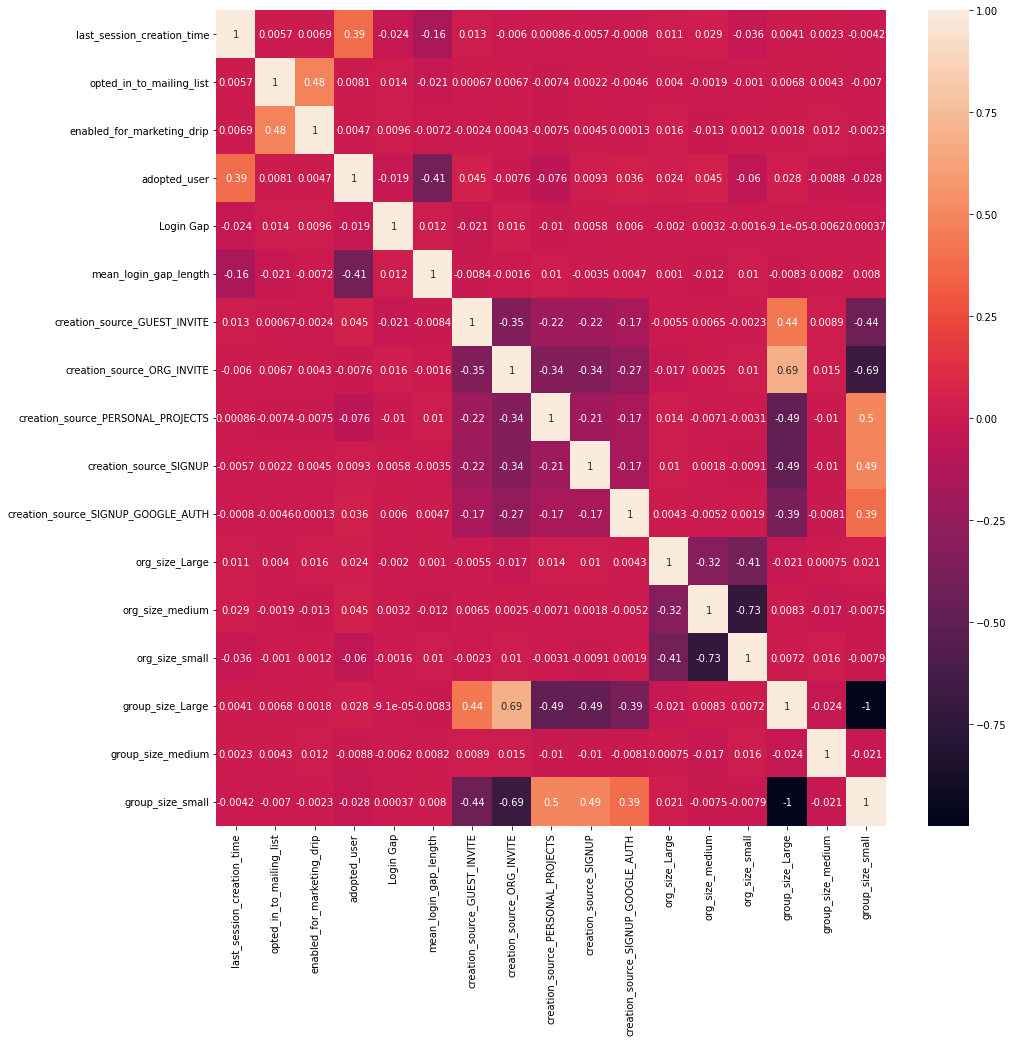

In [63]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))

sns.heatmap(df[top_corr_features].corr(),annot=True)

# Model Creation

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [66]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8040, 16)
(8040,)
(3960, 16)
(3960,)


In [67]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)

In [76]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [77]:
print("Confusion Matrix")
print(confusion_matrix(y_test, rfc_predict))

Confusion Matrix
[[3381   63]
 [  84  432]]


In [78]:
print("Classification Report")
print(classification_report(y_test, rfc_predict))

Classification Report
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      3444
         1.0       0.87      0.84      0.85       516

    accuracy                           0.96      3960
   macro avg       0.92      0.91      0.92      3960
weighted avg       0.96      0.96      0.96      3960



In [79]:
print("All AUC Scores")
print(rfc_cv_score)

All AUC Scores
[0.99194712 0.99309195 0.99082332 0.99247897 0.99259315 0.99027043
 0.99169772 0.99271635 0.98824419 0.99143646]


In [80]:
print("Mean AUC Score")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

Mean AUC Score
Mean AUC Score - Random Forest:  0.9915299643664465


In [81]:
feature_importance = pd.Series(rfc.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print(feature_importance)

mean_login_gap_length                 0.644229
last_session_creation_time            0.282705
Login Gap                             0.027688
opted_in_to_mailing_list              0.007525
enabled_for_marketing_drip            0.006322
org_size_small                        0.004543
org_size_medium                       0.003806
org_size_Large                        0.003420
creation_source_PERSONAL_PROJECTS     0.003343
creation_source_ORG_INVITE            0.003302
creation_source_GUEST_INVITE          0.003194
creation_source_SIGNUP                0.003075
creation_source_SIGNUP_GOOGLE_AUTH    0.003051
group_size_small                      0.001919
group_size_Large                      0.001876
group_size_medium                     0.000004
dtype: float64


In [82]:
fi = pd.DataFrame(feature_importance)
fi.columns = ['user']
new_fi = fi.reset_index()
new_fi.columns=['feature','score']
new_fi

,feature,score
0,mean_login_gap_length,0.644229
1,last_session_creation_time,0.282705
2,Login Gap,0.027688
3,opted_in_to_mailing_list,0.007525
4,enabled_for_marketing_drip,0.006322
5,org_size_small,0.004543
6,org_size_medium,0.003806
7,org_size_Large,0.003420
8,creation_source_PERSONAL_PROJECTS,0.003343
9,creation_source_ORG_INVITE,0.003302
